In [4]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=8bb384951ec8c202923e5a62efe47d65ca653e582e86a121f45b0a9f82ff4d9d
  Stored in directory: c:\users\panda\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [46]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [7]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [8]:
len(X_train)

60000

In [9]:
len(X_test)

10000

In [10]:
X_train[0].shape

(28, 28)

In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<Figure size 432x288 with 0 Axes>

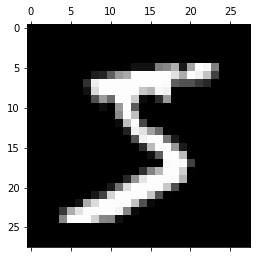

In [16]:
plt.gray()
plt.matshow(X_train[0])

In [17]:
y_train[0]

5

In [18]:
X_train = X_train / 255
X_test = X_test / 255

In [19]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [20]:
X_train_flattened.shape

(60000, 784)

In [21]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=40)

Epoch 1/40
1875/1875 [==============================] - 1s 608us/step - loss: 0.4674 - accuracy: 0.8791
Epoch 2/40
1875/1875 [==============================] - 1s 624us/step - loss: 0.3035 - accuracy: 0.9153
Epoch 3/40
1875/1875 [==============================] - 1s 602us/step - loss: 0.2829 - accuracy: 0.9205
Epoch 4/40
1875/1875 [==============================] - 1s 617us/step - loss: 0.2726 - accuracy: 0.9238
Epoch 5/40
1875/1875 [==============================] - 1s 657us/step - loss: 0.2667 - accuracy: 0.9258
Epoch 6/40
1875/1875 [==============================] - 1s 626us/step - loss: 0.2617 - accuracy: 0.9268
Epoch 7/40
1875/1875 [==============================] - 1s 632us/step - loss: 0.2587 - accuracy: 0.9286
Epoch 8/40
1875/1875 [==============================] - 1s 617us/step - loss: 0.2553 - accuracy: 0.9297
Epoch 9/40
1875/1875 [==============================] - 1s 610us/step - loss: 0.2529 - accuracy: 0.9308
Epoch 10/40
1875/1875 [==============================] - 1s 602u

In [25]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 620us/step - loss: 0.2786 - accuracy: 0.9276


[0.27857357263565063, 0.9276000261306763]

In [26]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 510us/step


array([4.0141567e-06, 5.4767276e-12, 7.3029900e-05, 9.6651560e-01,
       4.2928683e-04, 8.5529514e-02, 1.9148890e-12, 9.9988741e-01,
       4.0342201e-02, 5.1219058e-01], dtype=float32)

<Figure size 432x288 with 0 Axes>

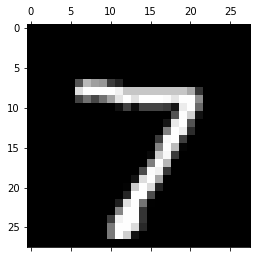

In [27]:
plt.gray()
plt.matshow(X_test[0])

In [28]:
np.argmax(y_predicted[0])

7

In [29]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [30]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

<Figure size 432x288 with 0 Axes>

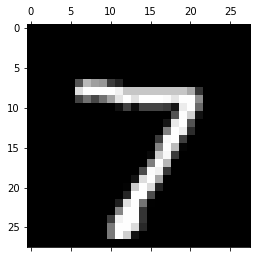

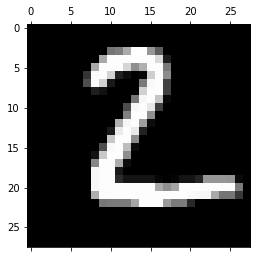

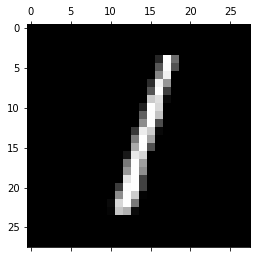

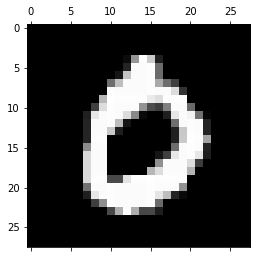

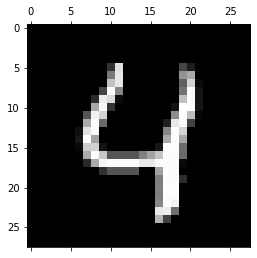

In [31]:
for i in range(0,5):
    plt.gray();
    plt.matshow(X_test[i])

In [32]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    2,    1,    5,    4,    3,    1,    0],
       [   0, 1115,    6,    2,    0,    2,    3,    2,    5,    0],
       [   6,    7,  946,   14,   10,    3,   10,    9,   23,    4],
       [   3,    0,   20,  928,    2,   22,    2,   10,   17,    6],
       [   1,    3,    7,    2,  925,    0,    7,    6,    7,   24],
       [  10,    3,    3,   34,    9,  782,   14,    7,   26,    4],
       [  13,    3,    8,    1,    7,   14,  910,    1,    1,    0],
       [   1,    6,   25,    6,    5,    1,    0,  951,    3,   30],
       [  11,   12,   10,   27,    9,   36,    9,   10,  839,   11],
       [   9,    8,    1,   12,   29,    5,    0,   24,    5,  916]])>

Text(69.0, 0.5, 'Truth')

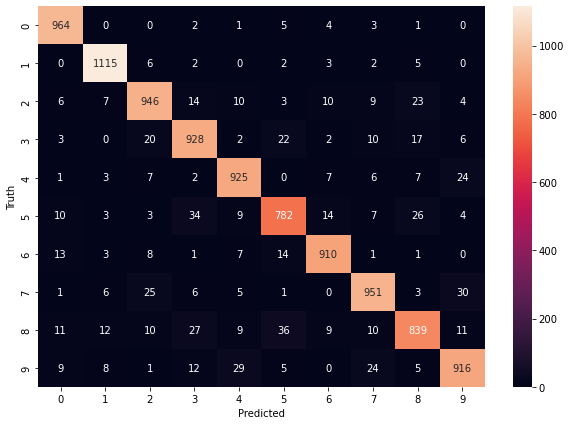

In [33]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=40)

Epoch 1/40
1875/1875 [==============================] - 2s 746us/step - loss: 0.2711 - accuracy: 0.9230
Epoch 2/40
1875/1875 [==============================] - 1s 738us/step - loss: 0.1220 - accuracy: 0.9640
Epoch 3/40
1875/1875 [==============================] - 1s 730us/step - loss: 0.0862 - accuracy: 0.9743
Epoch 4/40
1875/1875 [==============================] - 1s 730us/step - loss: 0.0662 - accuracy: 0.9797
Epoch 5/40
1875/1875 [==============================] - 1s 767us/step - loss: 0.0537 - accuracy: 0.9835
Epoch 6/40
1875/1875 [==============================] - 1s 756us/step - loss: 0.0427 - accuracy: 0.9869
Epoch 7/40
1875/1875 [==============================] - 1s 746us/step - loss: 0.0349 - accuracy: 0.9893
Epoch 8/40
1875/1875 [==============================] - 1s 750us/step - loss: 0.0291 - accuracy: 0.9906
Epoch 9/40
1875/1875 [==============================] - 1s 738us/step - loss: 0.0232 - accuracy: 0.9929
Epoch 10/40
1875/1875 [==============================] - 1s 750u

In [35]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 656us/step - loss: 0.1706 - accuracy: 0.9763


[0.17061063647270203, 0.9763000011444092]

313/313 [==============================] - 0s 543us/step


Text(69.0, 0.5, 'Truth')

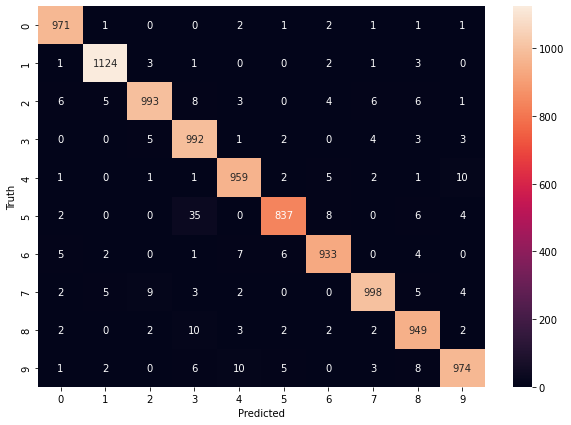

In [36]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=40)

Epoch 1/40
1875/1875 [==============================] - 2s 745us/step - loss: 0.2719 - accuracy: 0.9227
Epoch 2/40
1875/1875 [==============================] - 1s 744us/step - loss: 0.1227 - accuracy: 0.9648
Epoch 3/40
1875/1875 [==============================] - 2s 795us/step - loss: 0.0871 - accuracy: 0.9736
Epoch 4/40
1875/1875 [==============================] - 1s 755us/step - loss: 0.0681 - accuracy: 0.9790
Epoch 5/40
1875/1875 [==============================] - 1s 750us/step - loss: 0.0534 - accuracy: 0.9830
Epoch 6/40
1875/1875 [==============================] - 1s 744us/step - loss: 0.0434 - accuracy: 0.9865
Epoch 7/40
1875/1875 [==============================] - 1s 777us/step - loss: 0.0347 - accuracy: 0.9893
Epoch 8/40
1875/1875 [==============================] - 1s 758us/step - loss: 0.0286 - accuracy: 0.9912
Epoch 9/40
1875/1875 [==============================] - 1s 753us/step - loss: 0.0244 - accuracy: 0.9923
Epoch 10/40
1875/1875 [==============================] - 1s 758u

In [38]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 652us/step - loss: 0.1556 - accuracy: 0.9753


[0.15557515621185303, 0.9753000140190125]

313/313 [==============================] - 0s 584us/step


Text(69.0, 0.5, 'Truth')

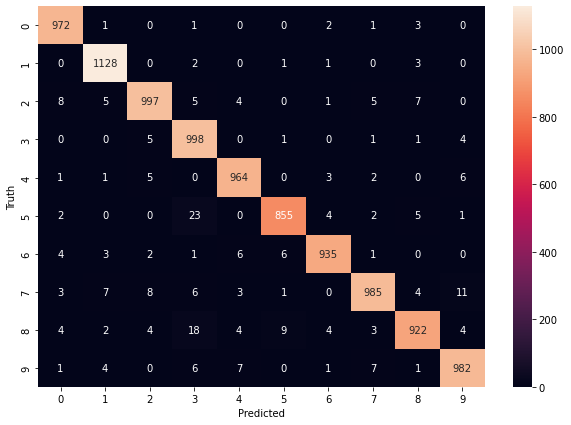

In [40]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [50]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=40)

Epoch 1/40
1875/1875 [==============================] - 101s 54ms/step - loss: 0.1690 - accuracy: 0.9472
Epoch 2/40
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0648 - accuracy: 0.9811
Epoch 3/40
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0522 - accuracy: 0.9849
Epoch 4/40
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0417 - accuracy: 0.9873
Epoch 5/40
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0371 - accuracy: 0.9893
Epoch 6/40
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0350 - accuracy: 0.9892
Epoch 7/40
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0312 - accuracy: 0.9906
Epoch 8/40
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0287 - accuracy: 0.9912
Epoch 9/40
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0262 - accuracy: 0.9919
Epoch 10/40
1875/1875 [==============================] 

In [51]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0233 - accuracy: 0.9946


[0.023281199857592583, 0.9945999979972839]

313/313 [==============================] - 3s 9ms/step


Text(69.0, 0.5, 'Truth')

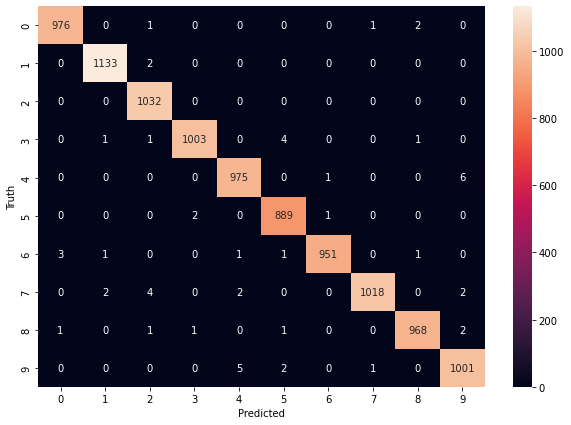

In [52]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')